<a href="https://colab.research.google.com/github/scorpion8567460/Test8567460/blob/main/Autocomplete_and_Autocorrect_Data_Analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost fastcluster tslearn hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.0/194.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 38.0 MB/s eta 0:00:00


#Main Libs

In [2]:
import pandas as pd
import numpy as np
import os

#Data Viz Libs

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

#Data prep

In [4]:
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report

#Data Algos

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
!pip install dask

#Data READ

In [14]:
data = pd.read_csv("/content/creditcard_dataset.csv")

#Data PREVIEW

In [15]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


#Exploratory Data Analysis

In [16]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,...,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000
mean,15492.416374,-0.244326,0.242420,0.745774,0.277011,-0.163264,0.092881,-0.145279,0.022237,0.636382,...,-0.047949,-0.146461,-0.038093,0.010678,0.122924,0.033127,0.014454,0.007312,70.271100,0.004272
std,10512.066686,1.889986,1.527342,1.767726,1.466218,1.430821,1.331029,1.338260,1.346813,1.278839,...,0.828385,0.637567,0.520683,0.591180,0.437675,0.530315,0.393002,0.244372,205.363789,0.065222
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.728650,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,4536.250000,-0.959632,-0.329008,0.309235,-0.636713,-0.745156,-0.657306,-0.599403,-0.171779,-0.209565,...,-0.259497,-0.563992,-0.174213,-0.333314,-0.138325,-0.341917,-0.069146,-0.010879,5.750000,0.000000
50%,14796.000000,-0.302521,0.220079,0.898672,0.224608,-0.199377,-0.175434,-0.072254,0.023822,0.620176,...,-0.115398,-0.118803,-0.046994,0.061181,0.160495,-0.036546,0.003868,0.019083,16.000000,0.000000
75%,26220.500000,1.164473,0.870117,1.532922,1.142143,0.341367,0.486735,0.448572,0.279960,1.409142,...,0.049521,0.254057,0.073666,0.398549,0.400713,0.332729,0.096281,0.077551,59.980000,0.000000
max,30633.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7879.420000,1.000000


In [18]:
data['Class'].sum()

85.0

#Identify Non-Numerical Values by feature

In [19]:
nanCounter = np.isnan(data).sum()

In [20]:
nanCounter

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


#Identify Distinct Values by Feature

In [21]:
distinctCounter = data.apply(lambda x: len(x.unique()))

In [22]:
distinctCounter

,0
Time,13092
V1,19332
V2,19332
V3,19332
V4,19332
V5,19332
V6,19332
V7,19332
V8,19332
V9,19332


#Feature Matrix X and Labels array Y

In [23]:
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

#Standardization - Feature Matrix X

Rescale the feature matrix so that each feature has a mean of zero and standard deviation of 1

In [28]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

# Ensure dataX is clean
dataX = dataX.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
dataX = dataX.dropna()  # Drop rows with NaN values

# Initialize an empty DataFrame for the correlation matrix
correlationMatrix = pd.DataFrame(data=[], index=dataX.columns, columns=dataX.columns)

# Compute the correlation
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i, j] = np.round(pearsonr(dataX[i], dataX[j])[0], 2)

print(correlationMatrix)

        Time    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...   V20  \
Time     1.0   0.0 -0.03 -0.09  0.02 -0.08 -0.04 -0.06  0.06 -0.14  ...  0.01   
V1       0.0   1.0 -0.29  0.39 -0.13  0.17  0.14  0.31 -0.17  0.02  ... -0.16   
V2     -0.03 -0.29   1.0 -0.39  0.16 -0.25 -0.05 -0.13  0.11  -0.1  ... -0.06   
V3     -0.09  0.39 -0.39   1.0 -0.21  0.38  0.06   0.5 -0.38  0.22  ... -0.14   
V4      0.02 -0.13  0.16 -0.21   1.0 -0.14 -0.06 -0.19  0.12 -0.15  ...  0.03   
V5     -0.08  0.17 -0.25  0.38 -0.14   1.0  0.16  0.23 -0.21  0.05  ... -0.04   
V6     -0.04  0.14 -0.05  0.06 -0.06  0.16   1.0   0.1  -0.1  0.06  ... -0.02   
V7     -0.06  0.31 -0.13   0.5 -0.19  0.23   0.1   1.0  -0.2  0.08  ... -0.01   
V8      0.06 -0.17  0.11 -0.38  0.12 -0.21  -0.1  -0.2   1.0 -0.11  ...  0.09   
V9     -0.14  0.02  -0.1  0.22 -0.15  0.05  0.06  0.08 -0.11   1.0  ...  0.01   
V10     0.02  0.06 -0.06  0.29  -0.1  0.23   0.1  0.32 -0.21  0.04  ...  0.04   
V11    -0.05 -0.09  0.13 -0.

#Check Correlation using Pearson Correlation Coefficient

Pearson Correlation Coefficient(PCC) checks if there is any linear connection between two sets of data.

In [29]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

In [30]:
correlationMatrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.0,0.0,-0.03,-0.09,0.02,-0.08,-0.04,-0.06,0.06,-0.14,...,0.01,0.01,0.02,-0.01,-0.02,0.06,-0.03,0.0,0.02,0.04
V1,0.0,1.0,-0.29,0.39,-0.13,0.17,0.14,0.31,-0.17,0.02,...,-0.16,-0.13,0.04,-0.06,0.0,0.15,0.02,-0.14,0.04,-0.19
V2,-0.03,-0.29,1.0,-0.39,0.16,-0.25,-0.05,-0.13,0.11,-0.1,...,-0.06,0.06,-0.14,-0.02,-0.02,-0.08,-0.07,0.16,-0.06,-0.46
V3,-0.09,0.39,-0.39,1.0,-0.21,0.38,0.06,0.5,-0.38,0.22,...,-0.14,-0.04,0.25,0.05,0.04,-0.18,0.06,-0.2,-0.01,-0.12
V4,0.02,-0.13,0.16,-0.21,1.0,-0.14,-0.06,-0.19,0.12,-0.15,...,0.03,0.01,-0.02,-0.0,-0.04,-0.03,0.05,0.06,0.01,0.12
V5,-0.08,0.17,-0.25,0.38,-0.14,1.0,0.16,0.23,-0.21,0.05,...,-0.04,-0.08,-0.06,0.03,0.0,-0.07,-0.05,-0.12,-0.08,-0.31
V6,-0.04,0.14,-0.05,0.06,-0.06,0.16,1.0,0.1,-0.1,0.06,...,-0.02,0.06,0.0,-0.01,0.03,0.05,0.0,-0.07,-0.02,0.19
V7,-0.06,0.31,-0.13,0.5,-0.19,0.23,0.1,1.0,-0.2,0.08,...,-0.01,-0.13,0.05,0.06,-0.0,-0.14,-0.04,-0.21,-0.07,0.25
V8,0.06,-0.17,0.11,-0.38,0.12,-0.21,-0.1,-0.2,1.0,-0.11,...,0.09,-0.2,0.06,-0.09,0.01,0.05,-0.01,0.11,0.06,-0.05
V9,-0.14,0.02,-0.1,0.22,-0.15,0.05,0.06,0.08,-0.11,1.0,...,0.01,-0.03,0.02,-0.0,0.01,0.11,0.04,-0.07,-0.08,-0.01


#Data Visualization of Imbalanced Output Class

#1. Distribution of Numerical Features (Histogram)

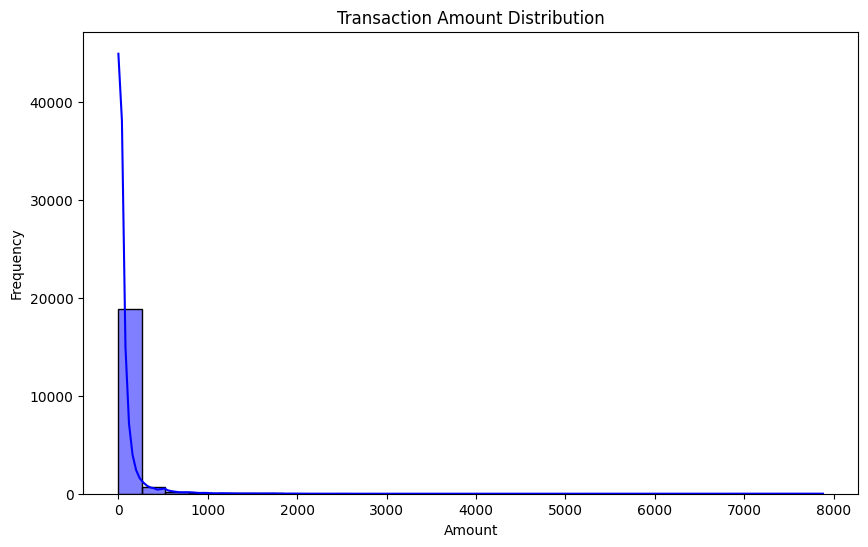

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram for the 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], kde=True, color='blue', bins=30)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

#2. Boxplot for Outlier Detection

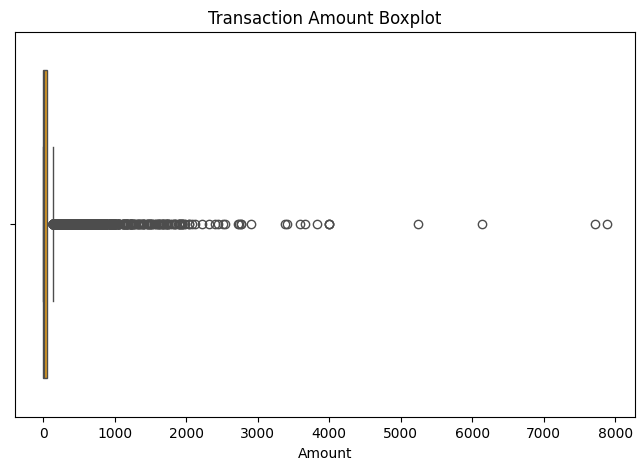

In [33]:
# Boxplot to visualize outliers in the 'Amount' column
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Amount'], color='orange')
plt.title('Transaction Amount Boxplot')
plt.xlabel('Amount')
plt.show()

#3. Correlation Heatmap

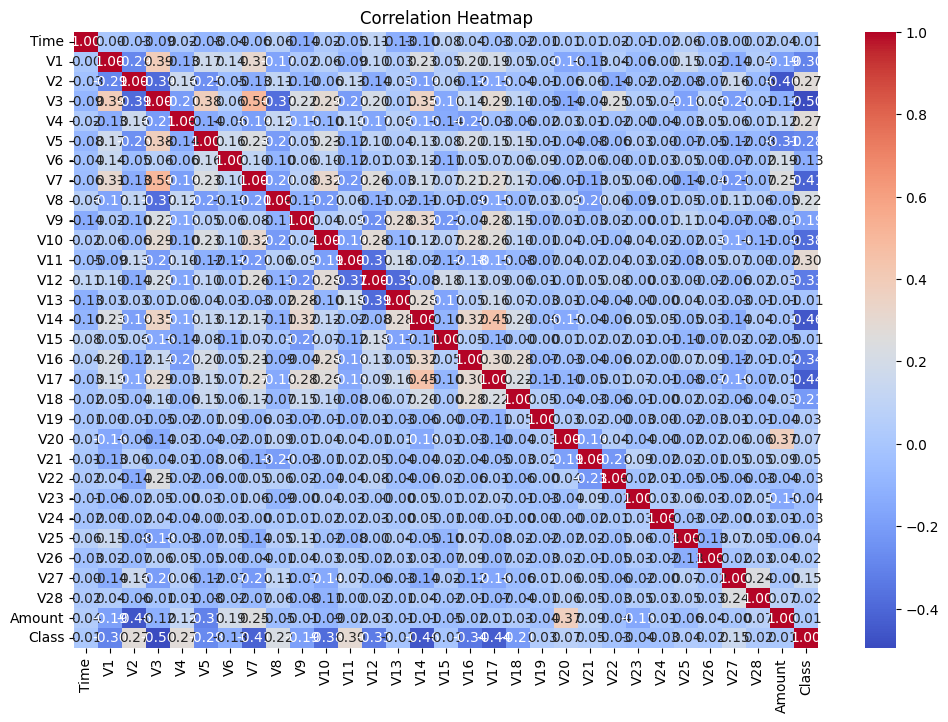

In [34]:
# Heatmap of correlations between numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#4. Pair Plot for Relationship Exploration

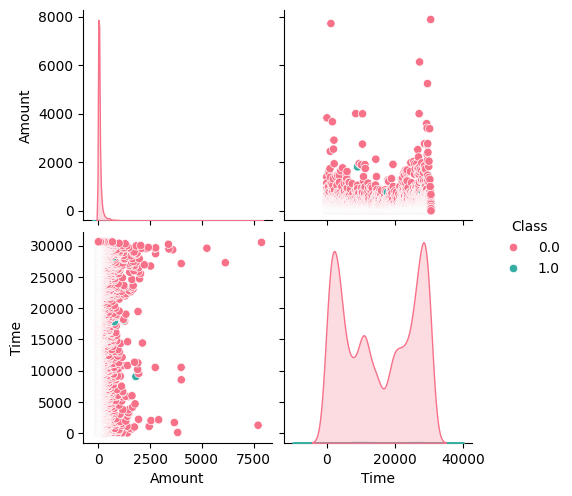

In [35]:
# Pairplot to visualize relationships between selected features
selected_features = ['Amount', 'Time', 'Class']
sns.pairplot(data[selected_features], hue='Class', palette='husl', diag_kind='kde')
plt.show()

#5. Time Series Plot for Fraud Analysis

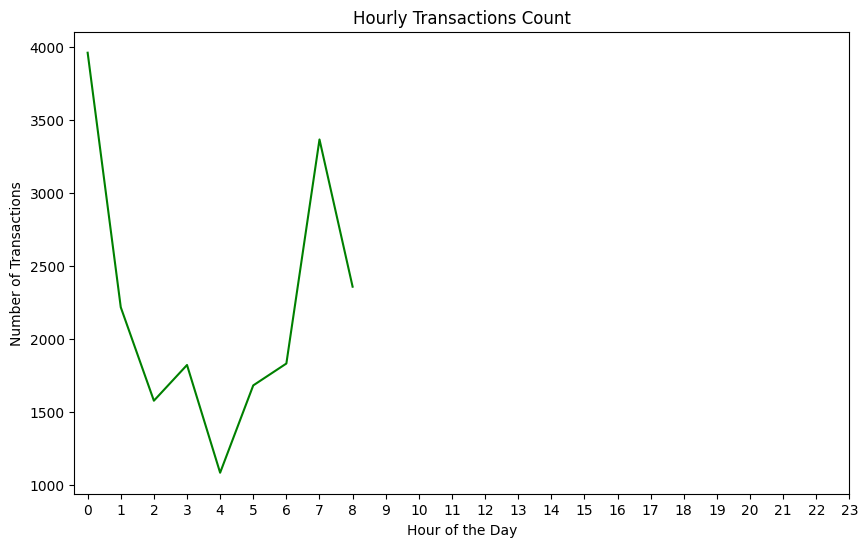

In [37]:
# Plot the number of transactions over time
data['Hour'] = (data['Time'] // 3600) % 24  # Extract hour from 'Time'
hourly_transactions = data.groupby('Hour')['Class'].count()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_transactions.index, y=hourly_transactions.values, color='green')
plt.title('Hourly Transactions Count')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.show()